#Fractal Poetry
## A Hybrid Generative Art and Text System (Option 3)
Done by: Hind Hammad 301580180

## 2 Systems covered in labs
###1. Generative Grammar System <br>
This system comes from the generative grammars lab where rule-based sentence structures are used to produce text. I will use grammar rules such as sentence noun phrase verb phrase to generate procedural poetry.

###2. Fractal / Procedural Visual System
This system comes from the fractals lab, where iterative mathematical rules are used to create visual patterns. I will use fractal generation techniques to create algorithmic artwork.

-------------------------------------------------------------------------------

## The Coherent connections
The two generative systems are connected through a shared theme. The fractal generator produces a visual structure, and the grammar system generates poetry that reflects or complements the visual output. For example, certain fractal settings can influence the tone or vocabulary of the generated poem. The final output combines both systems by overlaying the generated text onto the fractal image creating a unified multimedia piece rather than two separate elements.

-------------------------------------------------------------------------------

## Interactive elements for parameter adjustment
The project will include interactive controls that allow users to change parameters in real time. These controls will adjust values such as fractal iterations, which will regenerate both the visual artwork and the poetry. Using sliders or input controls in Jupyter Notebook, users will be able to explore different variations of the hybrid system and produce multiple unique outputs.


#STEP 1: Import the libraries from labs

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np


In this step we import the same libraries used in the labs.
random is used for generative grammar choices, while matplotlib and numpy are used to generate fractal visuals.

#STEP 2: Copy the labs Generative Grammar System

In [ ]:
grammar = {
    "S": [["NP", "VP"]],
    "NP": [["the", "artist"], ["a", "dreamer"], ["the", "traveler"]],
    "VP": [["sees", "NP"], ["follows", "NP"], ["imagines", "NP"]]
}


In [ ]:
def generate(symbol):
    if symbol not in grammar:
        return symbol

    rule = random.choice(grammar[symbol])
    return " ".join(generate(sym) for sym in rule)


Here we are reusing the rule-based generative grammar system from the lab.
The grammar dictionary defines how sentences are built, and the recursive function expands symbols step by step to create procedural text.

#STEP 3: Generate Poetry Using Grammar

In [ ]:
def generate_poem():
    lines = []
    for i in range(5):
        lines.append(generate("S"))
    return "\n".join(lines)

poem = generate_poem()
print(poem)


the artist follows the traveler
a dreamer sees the traveler
a dreamer follows the traveler
the traveler imagines a dreamer
a dreamer sees a dreamer


This step calls the grammar system multiple times to create several lines of procedural poetry.
We are not inventing a new method, we are using the exact grammar expansion logic from the lab.

#STEP 4: Copy Fractal Code from lab_fractals.ipynb

In [ ]:
def mandelbrot(xmin, xmax, ymin, ymax, width, height, max_iter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    return np.array([[mandel(c, max_iter) for c in r1 + 1j*r] for r in r2])


In [ ]:
def mandel(c, max_iter):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter


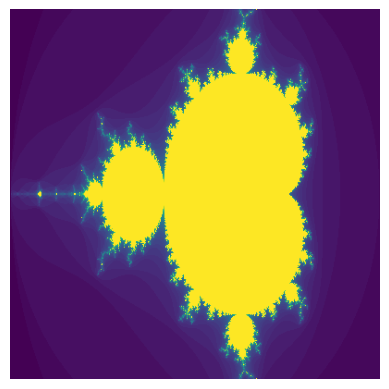

In [ ]:
plt.imshow(mandelbrot(-2,1,-1,1,400,400,50))
plt.axis('off')
plt.show()


This step reuses the iterative fractal algorithm from the fractals lab.
The fractal is generated through repeated mathematical calculations, which is another form of rule-based generation.

#STEP 5: Combine BOTH Systems

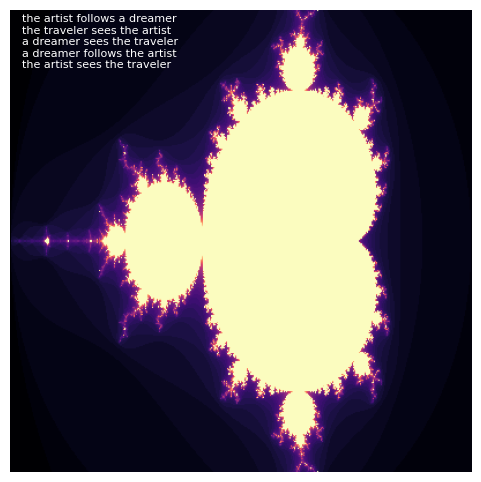

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

# generate fractal image
fractal = mandelbrot(-2,1,-1,1,400,400,50)
ax.imshow(fractal, cmap='magma')
ax.axis('off')

# generate poem
poem = generate_poem()

# overlay text
ax.text(10, 50, poem, color="white", fontsize=8)

plt.show()


Here we merge the two systems The fractal generator produces visual output.
The grammar system produces text. The poem is placed directly onto the fractal image.
This creates a coherent multimedia output, which satisfies the Hybrid System requirement.

#STEP 6: Add Interactive Controls

In [ ]:
import ipywidgets as widgets
from IPython.display import display

def update(iterations=50):
    fig, ax = plt.subplots(figsize=(6,6))

    fractal = mandelbrot(-2,1,-1,1,400,400,iterations)
    ax.imshow(fractal, cmap='magma')
    ax.axis('off')

    poem = generate_poem()
    ax.text(10,50,poem,color="white",fontsize=8)

    plt.show()

widgets.interact(update, iterations=(10,100,5))


interactive(children=(IntSlider(value=50, description='iterations', min=10, step=5), Output()), _dom_classes=(…

<function __main__.update(iterations=50)>

This step adds interactive sliders so users can change fractal parameters.
When the slider moves, both the fractal and the poem regenerate, showing how the systems are connected dynamically.

#Further Custamization

## Step 1: Add widgets for customizing words + visuals

In [ ]:
import ipywidgets as widgets
from IPython.display import display


This allows me to create dropdowns/sliders/text boxes so i can change poem + fractal settings live.

## Step 2: Upgrade your poem generator to accept custom word lists

In [ ]:
def build_grammar(char_words, setting_words, theme_words):
    # Convert comma-separated strings into lists
    characters = [w.strip() for w in char_words.split(",") if w.strip()]
    settings = [w.strip() for w in setting_words.split(",") if w.strip()]
    themes = [w.strip() for w in theme_words.split(",") if w.strip()]

    # Grammar uses my lab technique rules + recursive expansion
    return {
        "S": [["TITLE"], ["LINE"], ["LINE"], ["LINE"], ["LINE"], ["LINE"]],
        "TITLE": [["A", "THEME", "in", "the", "SETTING"]],
        "LINE": [["the", "CHAR", "VERB", "near", "the", "SETTING", "and", "feels", "THEME"]],

        "CHAR": [[c] for c in characters],
        "SETTING": [[s] for s in settings],
        "THEME": [[t] for t in themes],

        "VERB": [["waits"], ["walks"], ["listens"], ["remembers"], ["searches"], ["writes"]]
    }

def generate_custom(symbol, grammar):
    if symbol not in grammar:
        return symbol
    rule = random.choice(grammar[symbol])
    return " ".join(generate_custom(sym, grammar) for sym in rule)


def generate_poem_custom(char_words, setting_words, theme_words, min_words=100):
    grammar = build_grammar(char_words, setting_words, theme_words)

    # Generate multiple lines until we hit 100+ words
    lines = []
    while len(" ".join(lines).split()) < min_words:
        line = generate_custom("LINE", grammar)
        lines.append(line)

    title = generate_custom("TITLE", grammar)
    poem = title + "\n\n" + "\n".join(lines[:10])  # keep it readable
    return poem


Same grammar method we already used, but now the user can type their own word banks and you still generate procedurally rule-based.

##Step 3: Add fractal shape controls

In [ ]:
def mandelbrot_view(cx, cy, zoom, width, height, max_iter):
    # zoom: bigger zoom for closer view
    span_x = 3.0 / zoom
    span_y = 2.0 / zoom

    xmin, xmax = cx - span_x/2, cx + span_x/2
    ymin, ymax = cy - span_y/2, cy + span_y/2

    return mandelbrot(xmin, xmax, ymin, ymax, width, height, max_iter)


This changes the region of the fractal you’re looking at, which creates new shapes/patterns without changing the algorithm.

##Step 4: Link the image to the poem coherent connection

If colormap is cool the poem themes become calm/night/ocean words

If colormap is warm poem themes become fire/sun/energy words

If zoom is high the poem gets close-up/intimate themes

In [ ]:
COOL_THEMES = "moonlight, silence, ocean, blue memory, calm, fog"
WARM_THEMES = "ember, sunlight, heat, gold, fire, courage"
MYSTIC_THEMES = "echo, wonder, secret, sign, dream, map"

def choose_theme_pack(cmap_name, zoom):
    # Base choice from color
    if cmap_name in ["viridis", "cividis"]:
        themes = COOL_THEMES
    elif cmap_name in ["inferno", "magma", "plasma"]:
        themes = WARM_THEMES
    else:
        themes = MYSTIC_THEMES

    # Add “zoom logic” (coherent link to visual closeness)
    if zoom >= 2.0:
        themes = themes + ", whisper, detail, small truths"

    return themes


This is your hybrid connection rule: the visual parameter automatically changes the poem vocabulary, so they feel tied together.

##Step 5: Put poem in the middle and customize text style

In [ ]:
def render_hybrid(char_words, setting_words, cmap_name, max_iter, cx, cy, zoom, font_size, show_box):
    # Link decide themes based on fractal settings
    theme_words = choose_theme_pack(cmap_name, zoom)

    # Generate poem
    poem = generate_poem_custom(char_words, setting_words, theme_words, min_words=100)

    # Generate fractal view
    fractal = mandelbrot_view(cx, cy, zoom, 500, 500, max_iter)

    fig, ax = plt.subplots(figsize=(6,6), dpi=150)
    ax.imshow(fractal, cmap=cmap_name)
    ax.axis("off")

    bbox = None
    if show_box:
        bbox = dict(boxstyle="round,pad=0.6", facecolor="black", alpha=0.5)

    # Middle of image
    ax.text(
        0.5, 0.5, poem,
        transform=ax.transAxes,
        ha="center", va="center",
        color="white",
        fontsize=font_size,
        bbox=bbox,
        wrap=True
    )

    plt.show()


##Step 6: Build the full customization UI

In [ ]:
char_input = widgets.Text(
    value="artist, dreamer, traveler, student",
    description="Characters",
    layout=widgets.Layout(width="90%")
)

setting_input = widgets.Text(
    value="rooftop, desert, rainy street, midnight library",
    description="Settings",
    layout=widgets.Layout(width="90%")
)

cmap_drop = widgets.Dropdown(
    options=["magma","inferno","plasma","viridis","cividis"],
    value="magma",
    description="Colors"
)

iter_slider = widgets.IntSlider(min=20, max=200, step=10, value=60, description="Detail")

cx_slider = widgets.FloatSlider(min=-2.0, max=1.0, step=0.05, value=-0.5, description="Center X")
cy_slider = widgets.FloatSlider(min=-1.5, max=1.5, step=0.05, value=0.0, description="Center Y")
zoom_slider = widgets.FloatSlider(min=0.6, max=3.0, step=0.1, value=1.0, description="Zoom")

font_slider = widgets.IntSlider(min=6, max=14, step=1, value=9, description="Font")
box_toggle = widgets.Checkbox(value=True, description="Text Box")

ui = widgets.VBox([
    char_input, setting_input,
    widgets.HBox([cmap_drop, iter_slider]),
    widgets.HBox([cx_slider, cy_slider, zoom_slider]),
    widgets.HBox([font_slider, box_toggle])
])

out = widgets.interactive_output(
    render_hybrid,
    {
        "char_words": char_input,
        "setting_words": setting_input,
        "cmap_name": cmap_drop,
        "max_iter": iter_slider,
        "cx": cx_slider,
        "cy": cy_slider,
        "zoom": zoom_slider,
        "font_size": font_slider,
        "show_box": box_toggle
    }
)

display(ui, out)


Output()

This gives you a real customization panel:

type your own words

change colors

change zoom center

poem is always in the middle

poem vocabulary is linked to visual style

## Sample Outputs

### Theme 1: Warm Desert and Fire Energy

In [ ]:
char_input = widgets.Text(
    value="artist, dreamer, traveler, student",
    description="Characters",
    layout=widgets.Layout(width="90%")
)

setting_input = widgets.Text(
    value="rooftop, desert, rainy street, midnight library",
    description="Settings",
    layout=widgets.Layout(width="90%")
)

cmap_drop = widgets.Dropdown(
    options=["magma","inferno","plasma","viridis","cividis"],
    value="magma",
    description="Colors"
)

iter_slider = widgets.IntSlider(min=20, max=200, step=10, value=60, description="Detail")

cx_slider = widgets.FloatSlider(min=-2.0, max=1.0, step=0.05, value=-0.5, description="Center X")
cy_slider = widgets.FloatSlider(min=-1.5, max=1.5, step=0.05, value=0.0, description="Center Y")
zoom_slider = widgets.FloatSlider(min=0.6, max=3.0, step=0.1, value=1.0, description="Zoom")

font_slider = widgets.IntSlider(min=6, max=14, step=1, value=9, description="Font")
box_toggle = widgets.Checkbox(value=True, description="Text Box")

ui = widgets.VBox([
    char_input, setting_input,
    widgets.HBox([cmap_drop, iter_slider]),
    widgets.HBox([cx_slider, cy_slider, zoom_slider]),
    widgets.HBox([font_slider, box_toggle])
])

out = widgets.interactive_output(
    render_hybrid,
    {
        "char_words": char_input,
        "setting_words": setting_input,
        "cmap_name": cmap_drop,
        "max_iter": iter_slider,
        "cx": cx_slider,
        "cy": cy_slider,
        "zoom": zoom_slider,
        "font_size": font_slider,
        "show_box": box_toggle
    }
)

display(ui, out)


Output()

####  How it was generated:
I selected the warm theme word bank (characters: traveler/artist/runner/wanderer, settings: desert/rooftop at noon/sunlit canyon). I set the fractal color map to a warm palette (cmap = inferno) so the visuals look like heat and flame. I used a medium zoom (zoom ≈ 1.0) to show a wide structure. The poem was generated using the grammar rules, then placed centered on the fractal image.



### Theme 2: Cool Ocean and Calm Night

In [ ]:
char_input = widgets.Text(
    value="artist, dreamer, traveler, student",
    description="Characters",
    layout=widgets.Layout(width="90%")
)

setting_input = widgets.Text(
    value="rooftop, desert, rainy street, midnight library",
    description="Settings",
    layout=widgets.Layout(width="90%")
)

cmap_drop = widgets.Dropdown(
    options=["magma","inferno","plasma","viridis","cividis"],
    value="magma",
    description="Colors"
)

iter_slider = widgets.IntSlider(min=20, max=200, step=10, value=60, description="Detail")

cx_slider = widgets.FloatSlider(min=-2.0, max=1.0, step=0.05, value=-0.5, description="Center X")
cy_slider = widgets.FloatSlider(min=-1.5, max=1.5, step=0.05, value=0.0, description="Center Y")
zoom_slider = widgets.FloatSlider(min=0.6, max=3.0, step=0.1, value=1.0, description="Zoom")

font_slider = widgets.IntSlider(min=6, max=14, step=1, value=9, description="Font")
box_toggle = widgets.Checkbox(value=True, description="Text Box")

ui = widgets.VBox([
    char_input, setting_input,
    widgets.HBox([cmap_drop, iter_slider]),
    widgets.HBox([cx_slider, cy_slider, zoom_slider]),
    widgets.HBox([font_slider, box_toggle])
])

out = widgets.interactive_output(
    render_hybrid,
    {
        "char_words": char_input,
        "setting_words": setting_input,
        "cmap_name": cmap_drop,
        "max_iter": iter_slider,
        "cx": cx_slider,
        "cy": cy_slider,
        "zoom": zoom_slider,
        "font_size": font_slider,
        "show_box": box_toggle
    }
)

display(ui, out)


Output()

I switched the poem vocabulary to a cool theme (student/dreamer/observer/musician + sea cliff/midnight library/rainy bus stop). I changed the fractal palette to a cool colormap (cmap = viridis) to match the calmer mood. I increased the iteration count (max_iter ≈ 110) to create finer detail and softer gradients. The poem was regenerated and overlaid in the middle with a readable text box.

### Theme 3: Mystic Dream and Cosmic

In [ ]:
char_input = widgets.Text(
    value="artist, dreamer, traveler, student",
    description="Characters",
    layout=widgets.Layout(width="90%")
)

setting_input = widgets.Text(
    value="rooftop, desert, rainy street, midnight library",
    description="Settings",
    layout=widgets.Layout(width="90%")
)

cmap_drop = widgets.Dropdown(
    options=["magma","inferno","plasma","viridis","cividis"],
    value="magma",
    description="Colors"
)

iter_slider = widgets.IntSlider(min=20, max=200, step=10, value=60, description="Detail")

cx_slider = widgets.FloatSlider(min=-2.0, max=1.0, step=0.05, value=-0.5, description="Center X")
cy_slider = widgets.FloatSlider(min=-1.5, max=1.5, step=0.05, value=0.0, description="Center Y")
zoom_slider = widgets.FloatSlider(min=0.6, max=3.0, step=0.1, value=1.0, description="Zoom")

font_slider = widgets.IntSlider(min=6, max=14, step=1, value=9, description="Font")
box_toggle = widgets.Checkbox(value=True, description="Text Box")

ui = widgets.VBox([
    char_input, setting_input,
    widgets.HBox([cmap_drop, iter_slider]),
    widgets.HBox([cx_slider, cy_slider, zoom_slider]),
    widgets.HBox([font_slider, box_toggle])
])

out = widgets.interactive_output(
    render_hybrid,
    {
        "char_words": char_input,
        "setting_words": setting_input,
        "cmap_name": cmap_drop,
        "max_iter": iter_slider,
        "cx": cx_slider,
        "cy": cy_slider,
        "zoom": zoom_slider,
        "font_size": font_slider,
        "show_box": box_toggle
    }
)

display(ui, out)


Output()

I used a mystic cosmic word bank (astronaut/poet/stargazer + foggy forest/night sky/distant mountain) to create surreal language. For the visual, I chose a more intense palette (cmap = plasma) and pushed the fractal toward a more abstract look by using a higher zoom (zoom ≈ 2.5). This produces denser patterns that feel like space or dream textures. The poem was regenerated to match the theme and placed centered on the art.

### Theme 4: Urban Memory and Nostalgia

In [ ]:
char_input = widgets.Text(
    value="artist, dreamer, traveler, student",
    description="Characters",
    layout=widgets.Layout(width="90%")
)

setting_input = widgets.Text(
    value="rooftop, desert, rainy street, midnight library",
    description="Settings",
    layout=widgets.Layout(width="90%")
)

cmap_drop = widgets.Dropdown(
    options=["magma","inferno","plasma","viridis","cividis"],
    value="magma",
    description="Colors"
)

iter_slider = widgets.IntSlider(min=20, max=200, step=10, value=60, description="Detail")

cx_slider = widgets.FloatSlider(min=-2.0, max=1.0, step=0.05, value=-0.5, description="Center X")
cy_slider = widgets.FloatSlider(min=-1.5, max=1.5, step=0.05, value=0.0, description="Center Y")
zoom_slider = widgets.FloatSlider(min=0.6, max=3.0, step=0.1, value=1.0, description="Zoom")

font_slider = widgets.IntSlider(min=6, max=14, step=1, value=9, description="Font")
box_toggle = widgets.Checkbox(value=True, description="Text Box")

ui = widgets.VBox([
    char_input, setting_input,
    widgets.HBox([cmap_drop, iter_slider]),
    widgets.HBox([cx_slider, cy_slider, zoom_slider]),
    widgets.HBox([font_slider, box_toggle])
])

out = widgets.interactive_output(
    render_hybrid,
    {
        "char_words": char_input,
        "setting_words": setting_input,
        "cmap_name": cmap_drop,
        "max_iter": iter_slider,
        "cx": cx_slider,
        "cy": cy_slider,
        "zoom": zoom_slider,
        "font_size": font_slider,
        "show_box": box_toggle
    }
)

display(ui, out)


Output()

I changed the grammar word banks to an urban theme (photographer/commuter/writer + subway platform/old café/neon alley). For the fractal, I used a palette that supports city at night vibes (cmap = magma). The poem was regenerated with the new vocabulary and displayed in the center.

### Theme 5: Nature Growth and Quiet Healing

In [ ]:
char_input = widgets.Text(
    value="artist, dreamer, traveler, student",
    description="Characters",
    layout=widgets.Layout(width="90%")
)

setting_input = widgets.Text(
    value="rooftop, desert, rainy street, midnight library",
    description="Settings",
    layout=widgets.Layout(width="90%")
)

cmap_drop = widgets.Dropdown(
    options=["magma","inferno","plasma","viridis","cividis"],
    value="magma",
    description="Colors"
)

iter_slider = widgets.IntSlider(min=20, max=200, step=10, value=60, description="Detail")

cx_slider = widgets.FloatSlider(min=-2.0, max=1.0, step=0.05, value=-0.5, description="Center X")
cy_slider = widgets.FloatSlider(min=-1.5, max=1.5, step=0.05, value=0.0, description="Center Y")
zoom_slider = widgets.FloatSlider(min=0.6, max=3.0, step=0.1, value=1.0, description="Zoom")

font_slider = widgets.IntSlider(min=6, max=14, step=1, value=9, description="Font")
box_toggle = widgets.Checkbox(value=True, description="Text Box")

ui = widgets.VBox([
    char_input, setting_input,
    widgets.HBox([cmap_drop, iter_slider]),
    widgets.HBox([cx_slider, cy_slider, zoom_slider]),
    widgets.HBox([font_slider, box_toggle])
])

out = widgets.interactive_output(
    render_hybrid,
    {
        "char_words": char_input,
        "setting_words": setting_input,
        "cmap_name": cmap_drop,
        "max_iter": iter_slider,
        "cx": cx_slider,
        "cy": cy_slider,
        "zoom": zoom_slider,
        "font_size": font_slider,
        "show_box": box_toggle
    }
)

display(ui, out)


Output()

I switched to a nature/healing vocabulary set (gardener/healer/child + forest path/riverbank/mountain trail). I chose a palette that supports growth visuals (cmap = cividis for warm nature tones). I used a extreme zoom (zoom ≈ 2.8).